In [ ]:
# data_scraping
import pandas as pd


DATA_PATH = "ai_detect_essays_filtered.csv"

def show_dataset_info():
    df = pd.read_csv(DATA_PATH)
    print(f"Veri seti boyutu: {df.shape[0]} döküman, {df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
    print(f"Format: CSV, Sütunlar: {list(df.columns)}")
    print("Örnek veri:")
    print(df.iloc[0])

if __name__ == "__main__":
    show_dataset_info()

Veri seti boyutu: 9320 döküman, 23.95 MB
Format: CSV, Sütunlar: ['text', 'split', 'model', 'strategy', 'use_source_text', 'prompt_id', 'generated']
Örnek veri:
text               A life filled to the brim of better days is wh...
split                                                          train
model                                                        student
strategy                                                         NaN
use_source_text                                                 True
prompt_id                                                          0
generated                                                          0
Name: 0, dtype: object


Zipf grafiği 'zipf_raw.png' olarak kaydedildi.
Zipf grafiği 'zipf_lemmatized.png' olarak kaydedildi.
Zipf grafiği 'zipf_stemmed.png' olarak kaydedildi.


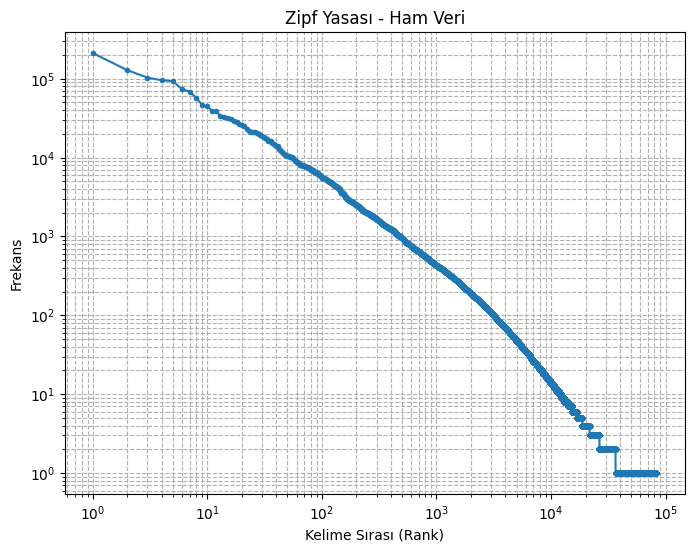

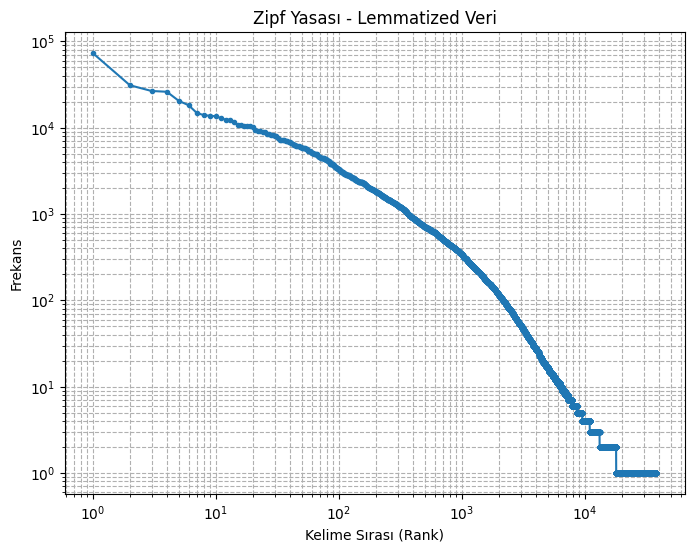

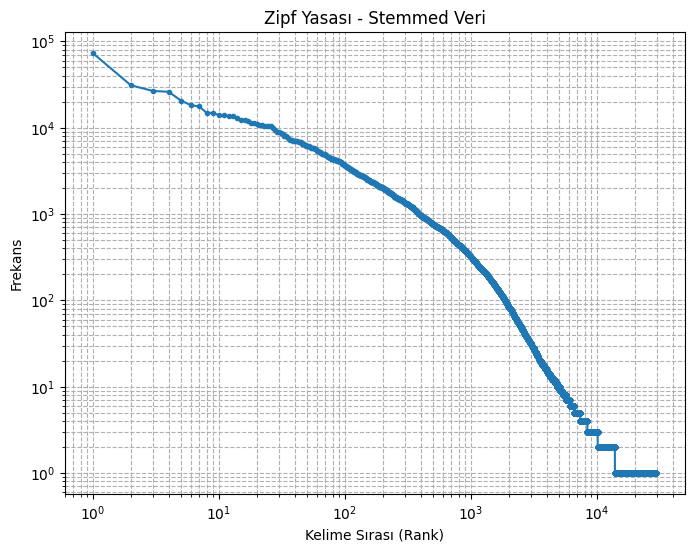

In [ ]:
# zipf_analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

DATA_FILES = [
    ("ai_detect_essays_filtered.csv", "zipf_raw.png", "Ham Veri"),
    ("essays_lemmatized.csv", "zipf_lemmatized.png", "Lemmatized Veri"),
    ("essays_stemmed.csv", "zipf_stemmed.png", "Stemmed Veri")
]

def plot_zipf(csv_file, out_file, title):
    df = pd.read_csv(csv_file, header=None)
    text = " ".join(df[0].astype(str))
    words = text.split()
    counts = Counter(words)
    freqs = np.array(sorted(counts.values(), reverse=True))
    ranks = np.arange(1, len(freqs)+1)
    plt.figure(figsize=(8,6))
    plt.loglog(ranks, freqs, marker=".")
    plt.title(f"Zipf Yasası - {title}")
    plt.xlabel("Kelime Sırası (Rank)")
    plt.ylabel("Frekans")
    plt.grid(True, which="both", ls="--")
    plt.savefig(out_file)
    print(f"Zipf grafiği '{out_file}' olarak kaydedildi.")

if __name__ == "__main__":
    for csv_file, out_file, title in DATA_FILES:
        plot_zipf(csv_file, out_file, title)

In [ ]:
# preprocessing
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import csv

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def preprocess_text(text, method='lemmatize'):
    stop_words = set([w.lower() for w in stopwords.words('english')])
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    sentences = sent_tokenize(str(text))
    processed_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
        if method == 'lemmatize':
            processed_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        elif method == 'stem':
            processed_tokens = [stemmer.stem(token) for token in filtered_tokens]
        else:
            processed_tokens = filtered_tokens
        processed_sentences.append(processed_tokens)
    return processed_sentences

def main():
    df = pd.read_csv("ai_detect_essays_filtered.csv")
    lemmatized_essays = []
    stemmed_essays = []
    lemmatized_sentences = []
    stemmed_sentences = []
    for text in df['text']:
        cleaned = clean_text(text)
        lemma = preprocess_text(cleaned, method='lemmatize')
        stem = preprocess_text(cleaned, method='stem')
        lemmatized_essays.append(' '.join([' '.join(s) for s in lemma]))
        stemmed_essays.append(' '.join([' '.join(s) for s in stem]))
        lemmatized_sentences.extend(lemma)
        stemmed_sentences.extend(stem)
    with open("essays_lemmatized.csv", "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f)
        for essay in lemmatized_essays:
            writer.writerow([essay])
    with open("essays_stemmed.csv", "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f)
        for essay in stemmed_essays:
            writer.writerow([essay])
    with open("sentences_lemmatized.csv", "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f)
        for sent in lemmatized_sentences:
            writer.writerow(sent)
    with open("sentences_stemmed.csv", "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f)
        for sent in stemmed_sentences:
            writer.writerow(sent)
    print("Preprocessing tamamlandı.")
    # Örnek çıktı
    print("\nÖrnek ham veri:")
    print(df['text'].iloc[0])
    print("\nTemizlenmiş (clean_text):")
    print(clean_text(df['text'].iloc[0]))
    print("\nLemmatized cümleler:")
    print(preprocess_text(clean_text(df['text'].iloc[0]), method='lemmatize'))
    print("\nStemmed cümleler:")
    print(preprocess_text(clean_text(df['text'].iloc[0]), method='stem'))

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing tamamlandı.

Örnek ham veri:
A life filled to the brim of better days is what we all want, and limiting car usage has some of these advantages. "When I had a car I was always tense. I'm much happier this way,' said Heidrun Walter. The sound of children outside of the pollution free community is much more satisfying then getting somewhere with dangers involved. A life without cars is less stressful and more free to explore in safety. Driving tends to make drivers uneasy for fear or crash or being late to work from traffic.

"Mr. Sivak's son lives in San Francisco and has a car but takes Bay Area Rapid Transit, when he can, even though that often takes longer than driving." Clearly being late to work and stressed is not something people favor epically when getting to work for free is possible. "Public transit was free of charge from Friday to Monday, according to the BBC." Instead of spending thousands of dollars expecting an easier lifestyle your neck rests on the chopping

In [6]:
!pip install -U nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# tfidf_vectorization
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def save_tfidf_matrix(input_file, output_file):
    df = pd.read_csv(input_file, header=None)
    texts = df[0].astype(str).tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df.to_csv(output_file, index=False)
    print(f"TF-IDF matrisi '{output_file}' olarak kaydedildi.")

if __name__ == "__main__":
    save_tfidf_matrix("essays_lemmatized.csv", "tfidf_lemmatized.csv")
    save_tfidf_matrix("essays_stemmed.csv", "tfidf_stemmed.csv")

TF-IDF matrisi 'tfidf_lemmatized.csv' olarak kaydedildi.
TF-IDF matrisi 'tfidf_stemmed.csv' olarak kaydedildi.


In [ ]:
# word2vec_training
from gensim.models import Word2Vec
import csv

PARAMETERS = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

def load_sentences(file_path):
    sentences = []
    with open(file_path, encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            if row:
                sentences.append(row)
    return sentences

def print_similar_words(model, word, topn=5):
    try:
        if word in model.wv:
            similar = model.wv.most_similar(word, topn=topn)
            print(f"\nModel: {model} - '{word}' ile En Benzer {topn} Kelime:")
            for w, score in similar:
                print(f"Kelime: {w}, Benzerlik Skoru: {score:.4f}")
        else:
            print(f"Kelime '{word}' modelde yok.")
    except Exception as e:
        print(f"Benzer kelime bulunamadı: {e}")

def train_and_save_models():
    for corpus_type in ['lemmatized', 'stemmed']:
        sentences = load_sentences(f"sentences_{corpus_type}.csv")
        for param in PARAMETERS:
            model = Word2Vec(
                sentences,
                vector_size=param['vector_size'],
                window=param['window'],
                min_count=1,
                sg=1 if param['model_type'] == 'skipgram' else 0
            )
            model_name = f"{corpus_type}_model_{param['model_type']}_window{param['window']}_dim{param['vector_size']}.model"
            model.save(model_name)
            print(f"{model_name} model saved!")
            print_similar_words(model, 'car', topn=5)

if __name__ == "__main__":
    train_and_save_models()

lemmatized_model_cbow_window2_dim100.model model saved!

Model: Word2Vec<vocab=43743, vector_size=100, alpha=0.025> - 'python' ile En Benzer 5 Kelime:
Kelime: agin, Benzerlik Skoru: 0.8051
Kelime: abouat, Benzerlik Skoru: 0.8043
Kelime: medel, Benzerlik Skoru: 0.8021
Kelime: realay, Benzerlik Skoru: 0.7945
Kelime: gamey, Benzerlik Skoru: 0.7945
lemmatized_model_skipgram_window2_dim100.model model saved!

Model: Word2Vec<vocab=43743, vector_size=100, alpha=0.025> - 'python' ile En Benzer 5 Kelime:
Kelime: dperived, Benzerlik Skoru: 0.9321
Kelime: enlightening, Benzerlik Skoru: 0.9316
Kelime: lightscience, Benzerlik Skoru: 0.9308
Kelime: ashamed, Benzerlik Skoru: 0.9300
Kelime: ideathis, Benzerlik Skoru: 0.9282
lemmatized_model_cbow_window4_dim100.model model saved!

Model: Word2Vec<vocab=43743, vector_size=100, alpha=0.025> - 'python' ile En Benzer 5 Kelime:
Kelime: unit, Benzerlik Skoru: 0.8127
Kelime: algorithm, Benzerlik Skoru: 0.7628
Kelime: weighting, Benzerlik Skoru: 0.7584
Kelime

In [1]:
!pip uninstall numpy scipy gensim -y
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1

In [ ]:
# model_similarity_analysis
from gensim.models import Word2Vec
import glob

MODEL_PATTERNS = [
    "lemmatized_model_*.model",
    "stemmed_model_*.model"
]

def print_similar_words(model_path, word, topn=5):
    try:
        model = Word2Vec.load(model_path)
        if word in model.wv:
            similar = model.wv.most_similar(word, topn=topn)
            print(f"\nModel: {model_path} - '{word}' ile En Benzer {topn} Kelime:")
            for w, score in similar:
                print(f"Kelime: {w}, Benzerlik Skoru: {score:.4f}")
        else:
            print(f"Kelime '{word}' modelde yok. (Model: {model_path})")
    except Exception as e:
        print(f"Model yüklenemedi veya hata oluştu: {model_path} - {e}")

if __name__ == "__main__":
    word = "car"
    for pattern in MODEL_PATTERNS:
        for model_path in glob.glob(pattern):
            print_similar_words(model_path, word, topn=5)


Model: lemmatized_model_cbow_window2_dim100.model - 'car' ile En Benzer 5 Kelime:
Kelime: vehicle, Benzerlik Skoru: 0.7908
Kelime: completly, Benzerlik Skoru: 0.6557
Kelime: automobile, Benzerlik Skoru: 0.6398
Kelime: completely, Benzerlik Skoru: 0.6297
Kelime: therefore, Benzerlik Skoru: 0.5734

Model: lemmatized_model_cbow_window4_dim100.model - 'car' ile En Benzer 5 Kelime:
Kelime: vehicle, Benzerlik Skoru: 0.7767
Kelime: automobile, Benzerlik Skoru: 0.6040
Kelime: completely, Benzerlik Skoru: 0.5885
Kelime: lastly, Benzerlik Skoru: 0.5663
Kelime: fully, Benzerlik Skoru: 0.5592

Model: lemmatized_model_cbow_window4_dim300.model - 'car' ile En Benzer 5 Kelime:
Kelime: vehicle, Benzerlik Skoru: 0.7470
Kelime: automobile, Benzerlik Skoru: 0.5952
Kelime: fully, Benzerlik Skoru: 0.5828
Kelime: completely, Benzerlik Skoru: 0.5521
Kelime: lastly, Benzerlik Skoru: 0.5143

Model: lemmatized_model_skipgram_window2_dim100.model - 'car' ile En Benzer 5 Kelime:
Kelime: vehicle, Benzerlik Skoru:

Benzerlik dağılımı 'similarity_distribution_lemmatized.png' olarak kaydedildi.
Toplam çift sayısı: 43426540.0
%30.0'dan yüksek benzerlik gösteren çift sayısı: 4359105.0
Yüksek benzerlik oranı: 10.04%
Ortalama benzerlik: 0.1003
Medyan benzerlik: 0.0414
Benzerlik dağılımı 'similarity_distribution_stemmed.png' olarak kaydedildi.
Toplam çift sayısı: 43426540.0
%30.0'dan yüksek benzerlik gösteren çift sayısı: 5490110.0
Yüksek benzerlik oranı: 12.64%
Ortalama benzerlik: 0.1113
Medyan benzerlik: 0.0476


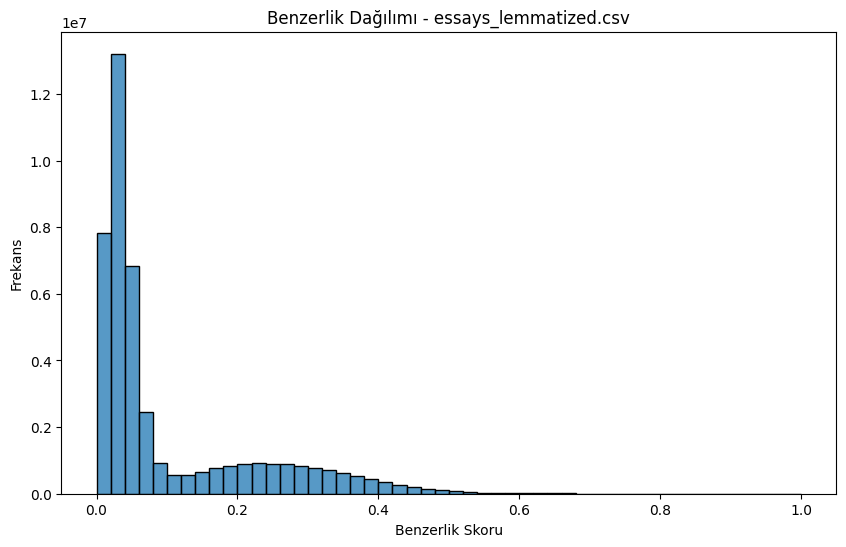

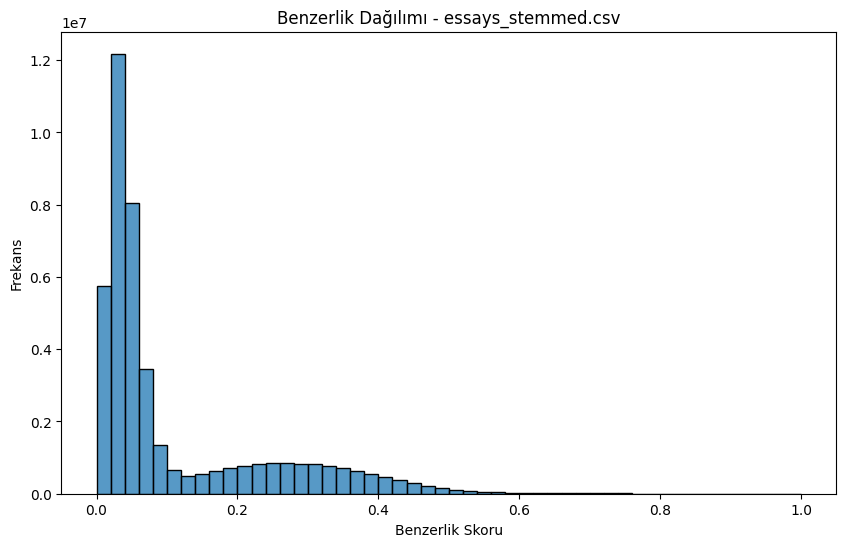

In [ ]:
# similarity_distribution
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_and_plot_similarity(input_file, out_img, threshold=0.3):
    df = pd.read_csv(input_file, header=None)
    texts = df[0].astype(str).tolist()
    if not any(texts):
        print(f"Uyarı: {input_file} boş veya geçersiz.")
        return
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    if tfidf_matrix.shape[1] == 0:
        print(f"Uyarı: {input_file} için TF-IDF matrisinde hiç kelime yok.")
        return
    similarity_matrix = cosine_similarity(tfidf_matrix)
    if np.all(similarity_matrix == 0):
        print(f"Uyarı: {input_file} için tüm benzerlikler sıfır.")
        return
    plt.figure(figsize=(10, 6))
    sns.histplot(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)], bins=50)
    plt.title(f'Benzerlik Dağılımı - {input_file}')
    plt.xlabel('Benzerlik Skoru')
    plt.ylabel('Frekans')
    plt.savefig(out_img)
    print(f"Benzerlik dağılımı '{out_img}' olarak kaydedildi.")
    high_similarity = np.sum(similarity_matrix > threshold) / 2
    total_pairs = similarity_matrix.shape[0] * (similarity_matrix.shape[0] - 1) / 2
    print(f"Toplam çift sayısı: {total_pairs}")
    print(f"%{threshold*100}'dan yüksek benzerlik gösteren çift sayısı: {high_similarity}")
    print(f"Yüksek benzerlik oranı: {high_similarity/total_pairs:.2%}")
    print(f"Ortalama benzerlik: {np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.4f}")
    print(f"Medyan benzerlik: {np.median(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.4f}")

if __name__ == "__main__":
    compute_and_plot_similarity("essays_lemmatized.csv", "similarity_distribution_lemmatized.png")
    compute_and_plot_similarity("essays_stemmed.csv", "similarity_distribution_stemmed.png")

In [ ]:
# similarity_report
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def generate_similarity_report(input_file, output_file, threshold=0.3):
    df = pd.read_csv(input_file, header=None)
    texts = df[0].astype(str).tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    n = similarity_matrix.shape[0]
    matches = []
    with open(output_file, "w", encoding="utf-8") as f:
        f.write("Essay1_ID,Essay2_ID,Similarity,Essay1_Text,Essay2_Text,Common_Words\n")
        for i in range(n):
            for j in range(i+1, n):
                sim = similarity_matrix[i, j]
                if sim > threshold:
                    words1 = set(texts[i].lower().split())
                    words2 = set(texts[j].lower().split())
                    common_words = words1.intersection(words2)
                    f.write(f"{i},{j},{sim:.2f},\"{texts[i][:100]}...\",\"{texts[j][:100]}...\",\"{', '.join(list(common_words)[:10])}\"\n")
                    matches.append((i, j, sim, texts[i][:100], texts[j][:100]))
    print(f"Detaylı eşleşme raporu '{output_file}' olarak kaydedildi.")
    print(f"\nToplam {len(matches)} çiftte %{int(threshold*100)}'dan yüksek benzerlik bulundu.")
    if matches:
        print("\nÖrnek eşleşmeler:")
        for i, j, sim, t1, t2 in matches[:3]:
            print(f"Essay {i} & Essay {j} - Benzerlik: {sim:.2f}")
            print(f"Essay {i}: {t1}...")
            print(f"Essay {j}: {t2}...\n")

if __name__ == "__main__":
    generate_similarity_report("essays_lemmatized.csv", "similarity_report_lemmatized.csv")
    generate_similarity_report("essays_stemmed.csv", "similarity_report_stemmed.csv")

Detaylı eşleşme raporu 'similarity_report_lemmatized.csv' olarak kaydedildi.

Toplam 4354445 çiftte %30'dan yüksek benzerlik bulundu.

Örnek eşleşmeler:
Essay 0 & Essay 57 - Benzerlik: 0.30
Essay 0: life filled brim better day want limiting car usage advantage car always tense im much happier way s...
Essay 57: turning one best time life get license new car dont rely parent take every instead getting new car g...

Essay 0 & Essay 121 - Benzerlik: 0.30
Essay 0: life filled brim better day want limiting car usage advantage car always tense im much happier way s...
Essay 121: world war ii start development centering car recent year popularity well traffic gone limiting car u...

Essay 0 & Essay 126 - Benzerlik: 0.30
Essay 0: life filled brim better day want limiting car usage advantage car always tense im much happier way s...
Essay 126: ford volkswagen kia chevys car brand may massive part american culture significance life may declini...

Detaylı eşleşme raporu 'similarity_report_stemme

In [ ]:
# model_report
from gensim.models import Word2Vec

def print_similar_words(model_path, word, topn=3):
    model = Word2Vec.load(model_path)
    if word in model.wv:
        similarity = model.wv.most_similar(word, topn=topn)
        print(f"\nModel: {model_path} - '{word}' ile En Benzer {topn} Kelime:")
        for w, score in similarity:
            print(f"Kelime: {w}, Benzerlik Skoru: {score}")
    else:
        print(f"Kelime '{word}' modelde yok.")

if __name__ == "__main__":
    print_similar_words("lemmatized_model_cbow_window2_dim100.model", "car")
    print_similar_words("stemmed_model_skipgram_window4_dim100.model", "car")
    print_similar_words("lemmatized_model_skipgram_window2_dim300.model", "car")


Model: lemmatized_model_cbow_window2_dim100.model - 'car' ile En Benzer 3 Kelime:
Kelime: vehicle, Benzerlik Skoru: 0.7908410429954529
Kelime: completly, Benzerlik Skoru: 0.6557451486587524
Kelime: automobile, Benzerlik Skoru: 0.6397949457168579

Model: stemmed_model_skipgram_window4_dim100.model - 'car' ile En Benzer 3 Kelime:
Kelime: vehicl, Benzerlik Skoru: 0.8395549654960632
Kelime: driverless, Benzerlik Skoru: 0.8312039971351624
Kelime: non, Benzerlik Skoru: 0.7942559719085693

Model: lemmatized_model_skipgram_window2_dim300.model - 'car' ile En Benzer 3 Kelime:
Kelime: driverless, Benzerlik Skoru: 0.7525455951690674
Kelime: automobile, Benzerlik Skoru: 0.7330740690231323
Kelime: vehicle, Benzerlik Skoru: 0.711918294429779
